In [1]:
import numpy as np

In [3]:
import torch
import torch.nn as nn

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
a = 2
N = 100000
x = np.linspace(0, a, N+1 )
Delta_x  = x[1] - x[0]

hbar = 1
m = 1

#Energy
E = ((hbar**2) * (np.pi**2))/(2*m*4) #n =1 and l = 2
E = torch.tensor(E, requires_grad = True, dtype = torch.float64)
E

tensor(1.2337, dtype=torch.float64, requires_grad=True)

In [9]:
Delta_x 

2e-05

In [11]:
x.shape

(100001,)

In [13]:
def true_psi(n,x):
    psi = np.sqrt(2/a)*np.sin(n*np.pi*x/a)
    return psi

In [15]:
psi_data = []
for i in x:
    psi_data.append([i, true_psi(1,i)])

In [16]:
psi_data = np.array(psi_data)

In [19]:
import matplotlib.pyplot as pltrue, np.argmax(pred_val, axis=1))
r2_train = r2_score(y_train_true

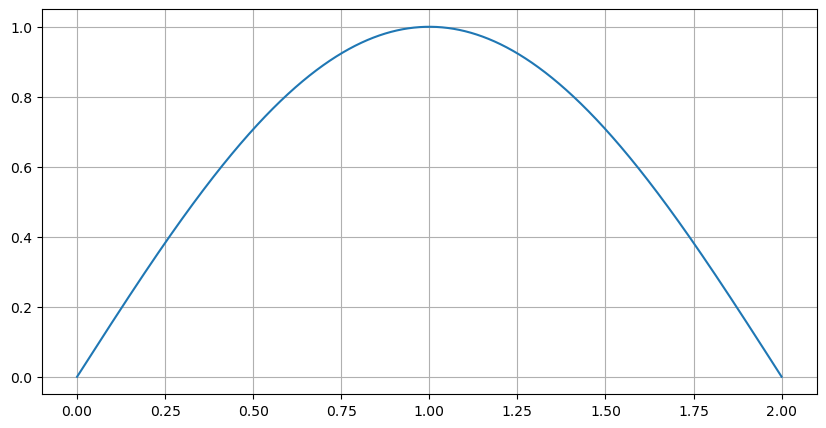

In [20]:
plt.figure(figsize=(10,5))
plt.plot(psi_data[: , 0], psi_data[:, 1 ])
plt.grid()
plt.show()

In [23]:
features = psi_data[:,0]
targets = psi_data[:, 1]

In [25]:
targets.dtype

dtype('float64')

In [27]:
features.dtype

dtype('float64')

In [29]:
tensor_features = torch.from_numpy(features)
tensor_features.dtype

torch.float64

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(tensor_features, targets, test_size=0.1, random_state=28, shuffle=True)

In [35]:
x0_train = x_train.reshape(-1, 1).double()
x0_train.requires_grad_()

tensor([[1.2805],
        [0.7663],
        [1.4193],
        ...,
        [1.8331],
        [1.3925],
        [0.8448]], dtype=torch.float64, requires_grad=True)

In [37]:
import torch.optim as optim
from collections import OrderedDict
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [39]:
model = nn.Sequential(OrderedDict([
                      ('Input_Layer', nn.Linear(1, 20)),
                      ('Act1', nn.Tanh()),
                      ('Hidden_Layer1', nn.Linear(20,12)),
                      ('Act2', nn.Tanh()),
                      ('Hidden_Layer2', nn.Linear(12,5)),
                      ('Act3', nn.Tanh()),
                      ('Output_Layer', nn.Linear(5,1)),
                      ])).double()

In [41]:
def count_parameters(model):
    total_params = 0
    for p in mod)el.parameters():
        if p.requires_grad:
            total_params += p.numel()  # Accumulate the number of parameters
    return total_params

count_parameters(model)

363

In [43]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [44]:
x_train.requires_grad_()

tensor([1.2805, 0.7663, 1.4193,  ..., 1.8331, 1.3925, 0.8448],
       dtype=torch.float64, requires_grad=True)

In [47]:
def loss_fn(psi, x):
    x.requires_grad_()  # Ensure input requires gradients

    psi1 = torch.autograd.grad(psi, x, grad_outputs=torch.ones_like(psi), create_graph=True, allow_unused=True)[0]
    if psi1 is None:
        raise RuntimeError("psi1 is None. Ensure the model output depends on x.")
    
    psi2 = torch.autograd.grad(psi1, x, grad_outputs=torch.ones_like(psi1), create_graph=True, allow_unused=True)[0]
    if psi2 is None:
        raise RuntimeError("psi2 is None. Gradient computation failed.")
    
    res = -(hbar**2 / (2 * m)) * psi2 - (E * psi)
    return torch.mean(res**2)
    
    loss_res = torch.mean(res**2)
    loss_bc = torch.mean(psi[0]**2 + psi[-1]**2)
    return loss_res + loss_bc

In [48]:
def training_loop(model, x_train, epochs):
    for i in range(epochs):
        optimizer.zero_grad()
        psi = model(x_train)
        loss = loss_fn(psi, x_train)
        loss.backward()
        optimizer.step()
        
        if i % 1000 == 0:
            print(f'Epoch {i}, Loss: {loss.item()}')

In [51]:
x0_train.shape

torch.Size([90000, 1])

In [53]:
tensor_features.shape

torch.Size([100001])

In [55]:
tensor_features = tensor_features.view(-1, 1)

In [57]:
tensor_features.shape

torch.Size([100001, 1])

In [63]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [65]:
%%time
training_loop(model, tensor_features, epochs=2000)

Epoch 0, Loss: 0.045861795159588034
Epoch 1000, Loss: 3.587306762420795e-06
CPU times: user 32min 25s, sys: 1min 2s, total: 33min 27s
Wall time: 2min 55s


In [69]:
print(model)

Sequential(
  (Input_Layer): Linear(in_features=1, out_features=20, bias=True)
  (Act1): Tanh()
  (Hidden_Layer1): Linear(in_features=20, out_features=12, bias=True)
  (Act2): Tanh()
  (Hidden_Layer2): Linear(in_features=12, out_features=5, bias=True)
  (Act3): Tanh()
  (Output_Layer): Linear(in_features=5, out_features=1, bias=True)
)


In [71]:
#print(tensor_features.shape)

In [73]:
predict = model(tensor_features).detach().numpy()
predict.shape

(100001, 1)

In [75]:
predict = predict.reshape(-1)
predict.shape

(100001,)

In [77]:
norms = np.sum(predict**2 * Delta_x)
psi = predict / np.sqrt(norms)

In [79]:
predict.shape

(100001,)

In [81]:
features.shape)

(100001,)

In [83]:
targets.shape

(100001,)

In [85]:
psi.shape

(100001,)

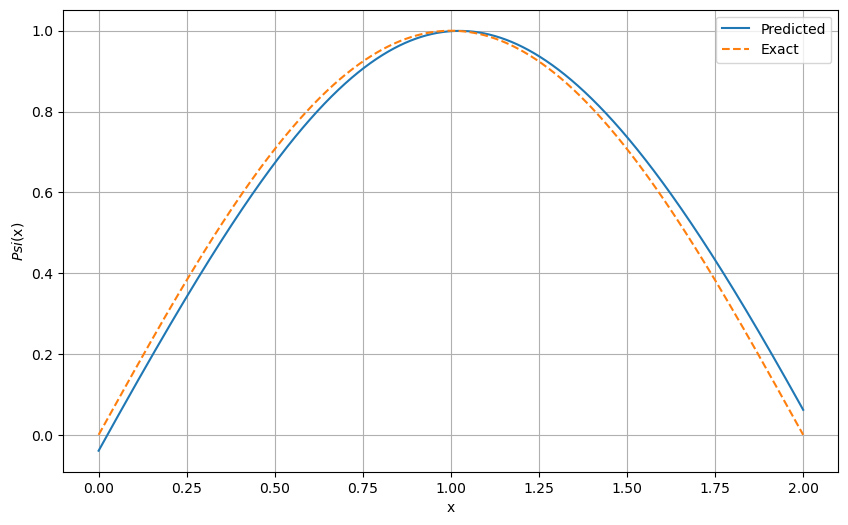

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(features, psi, label="Predicted")
plt.plot(features, targets, '--', label="Exact")
plt.xlabel('x')
plt.ylabel('$Psi$(x)')
plt.legend()
plt.grid()
plt.show()

In [89]:
from sklearn.metrics import r2_score

In [91]:
r2_score(psi, targets)

0.9873391914653749